# Introduction

1. [Read Data and PreCheck](#1)
1. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
        1. [Age Variable](#4)
        1. [Sex Variable](#5)
        1. [BP Variable](#6)
        1. [Cholesterol Variable](#7)
        1. [Na_to_K Variable](#8)
        1. [Drug Variable](#9)
1. [Basic Data Analysis and Visualization](#10)
    * [Age -- Drug](#11)
    * [Sex -- Drug](#12)
    * [BP -- Drug](#13)
    * [Na_to_K -- Drug](#14)
    * [Cholesterol -- Drug](#15)
    * [Na_to_K -- BP -- Drug](#16)
1. [Preparing Data and Feature Engineering](#17)
    * [Create New Features](#18)
        * [Na_to_K_Bigger_Than_15](#19)
    * [Label Encoding](#20)
    * [Train Test Split](#21)
1. [Model Implementation](#22)
    1. [KNN Classifier](#23)
        * [Default Parameters](#24)
        * [GridSearchCV](#25)
    2. [Random Forest Classifier](#26)
        * [Default Parameters](#27)
        * [GridSearchCV](#28)
    3. [SVM Classifier](#29)
        * [Default Parameters](#30)
        * [GridSearchCV](#31)
1. [Conclusion](#32)

In [3]:
#Installation of libraries
!pip install seaborn

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id='1'></a>
# Read Data and PreCheck

In [8]:
df = pd.read_csv("drug200.csv")

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [12]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

* No missing value
* 6 columns
* 200 rows

<a id='2'></a>
# Variable Description

* Age: Age of patient
* Sex: Gender of patient
* BP: Blood pressure of patient
* Cholesterol: Cholesterol of patient
* Na_to_K: Sodium to Potassium Ratio in Blood 
* Drug: Drug Type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
Age            200 non-null int64
Sex            200 non-null object
BP             200 non-null object
Cholesterol    200 non-null object
Na_to_K        200 non-null float64
Drug           200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


* float64(1): Na_to_K
* int64(1): Age
* object(4): Sex, BP, Cholesterol, Drug

<a id='3'></a>
## Univariate Variable Analysis

<a id='4'></a>
### Age Variable

Max Age: 74
Min Age: 15


(array([16., 22., 20., 20., 21., 28., 16., 23., 18., 16.]),
 array([15. , 20.9, 26.8, 32.7, 38.6, 44.5, 50.4, 56.3, 62.2, 68.1, 74. ]),
 <a list of 10 Patch objects>)

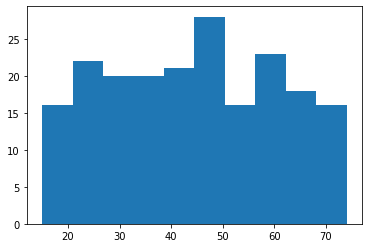

In [34]:
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
counts, bins = np.histogram(df.Age)
plt.hist(bins[:-1], bins, weights=counts)

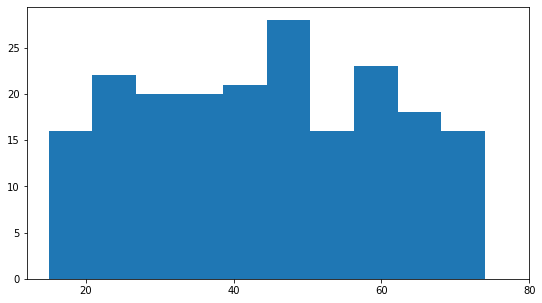

In [46]:
# Age distribution
plt.figure(figsize = (9,5))
plt.hist(df.Age)
plt.xticks([20,40,60,80])
plt.show()

* Age range is between 15 and 74.

<a id='5'></a>
### Sex Variable

In [47]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [57]:
# Sex Distribution
plt.figure(figsize=(9,5))
plt.bar(df.Sex, height=)
plt.show()

SyntaxError: invalid syntax (<ipython-input-57-2dd0932e444a>, line 3)

* The ratio of gender seems balanced in the data
* This is a categorical variable. It would be better if we apply label encoder to avoid any error during model implementation.

<a id='6'></a>
### BP Variable

In [ ]:
df.BP.value_counts()

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.BP)
plt.show()

<a id='7'></a>
### Cholesterol Variable

In [ ]:
df.Cholesterol.value_counts()

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Cholesterol)
plt.show()

* Cholesterol is a balanced data. 
* It is categorical and label encoder will apply on it.

<a id='8'></a>
### Na_to_K Variable

In [ ]:
print("Max Na_to_K:",df.Na_to_K.max())
print("Min Na_to_K:",df.Na_to_K.min())
print("Mean Na_to_K:",df.Na_to_K.mean())

In [ ]:
plt.figure(figsize = (9,5))
sns.distplot(df.Na_to_K)
plt.show()

<a id='9'></a>
### Drug Variable

In [ ]:
df.Drug.value_counts()

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(df.Drug)
plt.show()

* Drug is target column and you can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

<a id='10'></a>
# Basic Data Analysis

* Age -- Drug
* Sex -- Drug
* BP -- Drug
* Cholesterol -- Drug

<a id='11'></a>
## Age -- Drug

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age -- Drug")
plt.show()

In [ ]:
print("Minimum Age of DrugB",df.Age[df.Drug == "drugB"].min())
print("Maximum Age of DrugA",df.Age[df.Drug == "drugA"].max())

* DrugB is taken only by older than 51 years old. 
* DrugA is taken only by younger than 50 years old. 

<a id='12'></a>
## Sex -- Drug

In [ ]:
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
df_Sex_Drug

In [ ]:

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Sex -- Drug")
plt.show()

* Female people get drugA, drugB and drugC more than male people.
* Male people get DrugY more than female people.
* drugX seems equal for male and female people.
* According to this graph, Sex feature is not an important feature for classification.

<a id='13'></a>
## BP -- Drug

In [ ]:
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
df_BP_Drug

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("BP -- Drug")
plt.show()

* drugA and drugB are got only by people who have HIGH blood pressure.
* drugC is got by people who have LOW blood pressure.
* drugX is got by people who have HIGH blood pressure.
* BP is an important feature for classification.

<a id='14'></a>
## Na_to_K -- Drug

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Na_to_K -- Drug")
plt.show()

In [ ]:
print("Minimum Na_to_K for DrugY:",df.Na_to_K[df.Drug == "DrugY"].min())

* People who have Na_to_K ratio is bigger than 15, get DrugY.
* We can create a new feature from here.

<a id='15'></a>
## Cholesterol -- Drug

In [ ]:
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
df_CH_Drug

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Cholesterol -- Drug")
plt.show()

* drugC is got by people who have HIGH cholesterol.
* Cholesterol is an important feature to classify drugC

<a id='16'></a>
## Na_to_K -- BP -- Drug

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="BP",data = df)
plt.legend()
plt.title("Na_to_K -- BP -- Drug")
plt.show()

* If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
* If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

<a id='17'></a>
# Preparing Data and Feature Engineering

<a id='18'></a>
## Create New Features

<a id='19'></a>
### Na_to_K_Bigger_Than_15 

If Na_to_K is bigger than 15, it is always drugY.

In [ ]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]
df.head()

In [ ]:
df_NaK15 = df.groupby(["Drug","Na_to_K_Bigger_Than_15"]).size().reset_index(name = "Count")
df_NaK15

In [ ]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Na_to_K_Bigger_Than_15",data = df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

* Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

<a id='20'></a>
## Label Encoding

We will convert from object to int64

* Sex
* BP
* Cholesterol
* Na_to_K
* Na_to_K_Bigger_Than_15

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

In [ ]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Na_to_K_Bigger_Than_15","Drug"]

for l in label_list:
    label_encoder(l)

In [ ]:
df.head()

<a id='21'></a>
## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(["Drug"],axis=1)
y = df.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

Data was splitted as 80% train data and 20% test data.

<a id='22'></a>
# Model Implementation

I will try three models and compare their results. For all models, I apply GridSearchCV method to find best score. Also, to be sure our models performance are random, I will use 5 Fold Cross Validation method.

In [ ]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

<a id='23'></a>
## KNN Classifier

To find best score of KNN model, I will try different value of n_neighbors, p, and weights parameters. If you are not sure about what these parameters are you can check my another kernel [Understanding Parameters of KNN](http://www.kaggle.com/gorkemgunay/understanding-parameters-of-knn)

<a id='24'></a>
### Default Parameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

In [ ]:
result_dict_train["KNN Default Train Score"] = np.mean(accuracies)
result_dict_test["KNN Default Test Score"] = knn.score(x_test,y_test)

<a id='25'></a>
### GridSearchCV

In [ ]:
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

In [ ]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(x_test,y_test)

<a id='26'></a>
# Random Forest


To find best score of Random Forest model, I will try different value of n_estimators and criterion parameters.

<a id='27'></a>
### Default Parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, x_train, y_train, cv=5)
rfc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(x_test,y_test))

In [ ]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(x_test,y_test)

<a id='28'></a>
### GridSearchCV

In [ ]:
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(x_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(x_test,y_test))

In [ ]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(x_test,y_test)

<a id='29'></a>
# SVM Classifier

To find best score of SVM model, I will try different value of C, kernel, degree and gamma parameters. The easy way to do this is GridSearchCV method. If you are not sure about what these parameters are you can check my another kernel [Understanding Parameters of SVM](https://www.kaggle.com/gorkemgunay/understanding-parameters-of-svm)

<a id='30'></a>
### Default Parameters

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(x_test,y_test))

In [ ]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(x_test,y_test)

<a id='31'></a>
### GridSearchCV

In [ ]:
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(x_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(x_test,y_test))


In [ ]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(x_test,y_test)

<a id='32'></a>
# Conclusion

In [ ]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

In [ ]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

* Random Forest classifier  and SVM classifier (after hyperparameter tuning) have a good scores.
* KNN classifier has worst score in three clasifiers.